In [1]:
import numpy as np  
seed = 7
np.random.seed(seed)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
import pandas as pd
import pandas
import numpy as np

NUM_FEATURES = 31
 
dataframe = pandas.read_csv("data/features_feb5_both.csv", header=0)


established = dataframe[dataframe.stable==1] # established 
new = dataframe[dataframe.stable==0] # new
 
dataframe = new
# category 0 defines venues that closed 
# since we expect to have more venues that remained open than those that 
# closed, we select all of the closed venues and then a random sample of 
# opened venues of the same size, created balanced classes
class_one = dataframe[dataframe.label==0]
class_two = dataframe[dataframe.label==1].sample(n=len(class_one), replace=False)
dataset = pd.concat([class_one, class_two], ignore_index=True)
dataset = dataset.values 
 
X = dataset[:, 0:NUM_FEATURES]
y = dataset[:, NUM_FEATURES]

22

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# print the distribution of classes on train/test
print pd.value_counts(pd.Series(y_test), normalize=True)
print pd.value_counts(pd.Series(y_train), normalize=True)

1.0    0.5
0.0    0.5
dtype: float64
0.0    0.5
1.0    0.5
dtype: float64


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from scipy import stats

# logistic regression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_LR = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_LR[:, 1]))
 
print (metrics.classification_report(y_test, predicted))

#logistic regression coefficients 
#pd.concat([pd.DataFrame(dataframe.columns)[:-1],pd.DataFrame(np.transpose(clf.coef_))], axis = 1)

sse = np.sum((clf.predict(X_train) - y_train) ** 2, axis=0) / float(X_train.shape[0] - X_train.shape[1])
se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X_train.T, X_train))))])
#t = clf.coef_
#p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))

0.642857142857
0.755102040816
             precision    recall  f1-score   support

        0.0       0.67      0.57      0.62         7
        1.0       0.62      0.71      0.67         7

avg / total       0.65      0.64      0.64        14



LinAlgError: Singular matrix

In [93]:
from sklearn import ensemble

# gradient boosting 
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_GB = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.714285714286
0.704081632653
             precision    recall  f1-score   support

        0.0       0.71      0.71      0.71         7
        1.0       0.71      0.71      0.71         7

avg / total       0.71      0.71      0.71        14



In [94]:
from sklearn.dummy import DummyClassifier

# random baseline
clf = DummyClassifier(strategy='uniform')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_random = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_random[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.5
0.5
             precision    recall  f1-score   support

        0.0       0.50      0.57      0.53         7
        1.0       0.50      0.43      0.46         7

avg / total       0.50      0.50      0.50        14



In [95]:
from sklearn.svm import SVC

# svc
clf = SVC(probability=True)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_SVC = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.714285714286
0.704081632653
             precision    recall  f1-score   support

        0.0       0.80      0.57      0.67         7
        1.0       0.67      0.86      0.75         7

avg / total       0.73      0.71      0.71        14



In [96]:
from sklearn.ensemble import RandomForestClassifier

# random forest
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_RFC = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.642857142857
0.704081632653
             precision    recall  f1-score   support

        0.0       0.60      0.86      0.71         7
        1.0       0.75      0.43      0.55         7

avg / total       0.67      0.64      0.63        14



In [97]:
from sklearn.neural_network import MLPClassifier

# neural net 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_NN = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_NN[:, 1]))
 
print (metrics.classification_report(y_test, predicted))

0.642857142857
0.755102040816
             precision    recall  f1-score   support

        0.0       0.62      0.71      0.67         7
        1.0       0.67      0.57      0.62         7

avg / total       0.65      0.64      0.64        14



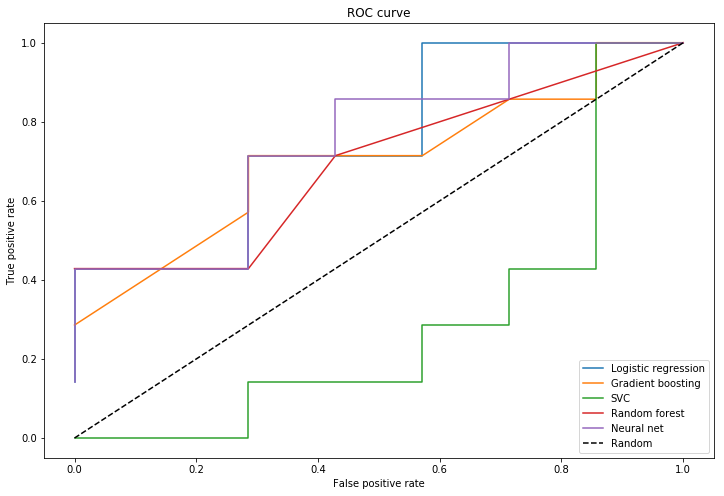

In [98]:
from matplotlib import pyplot as plt

# plot area under curve in order to compare multiple classifiers
fpr, tpr, _ = metrics.roc_curve(y_test, probs_LR[:, 1]) #classifier 1
fpr2, tpr2, _ = metrics.roc_curve(y_test, probs_GB[:, 1]) #classifier 2
fpr3, tpr3, _ = metrics.roc_curve(y_test, probs_SVC[:, 1]) #classifier 3
fpr4, tpr4, _ = metrics.roc_curve(y_test, probs_RFC[:, 1]) #classifier 3
fpr5, tpr5, _ = metrics.roc_curve(y_test, probs_NN[:, 1]) #classifier 3


fig = plt.figure(figsize=(12, 8)) #, dpi=100)

plt.plot(fpr,tpr, label='Logistic regression') 
plt.plot(fpr2,tpr2, label='Gradient boosting ')
plt.plot(fpr3,tpr3, label='SVC')
plt.plot(fpr4,tpr4, label='Random forest')
plt.plot(fpr5,tpr5, label='Neural net')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random')
plt.legend(loc="lower right") 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()